now that I know where intuition stands at, which that naturally you'd associate the future number of clicks with either the most recent value or the mean over the most recent period, we should look for alpha in less intuitive considerations 

# EDA

In [28]:
import pandas as pd 
Train=pd.read_csv('Train.csv')
Train.head()

,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,start_time,duration,end_time,display_location,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len
0,142.0,15.0,3393.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,5.0,11.0
1,89.0,8.0,1817.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,13.0
2,59.0,8.0,1743.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,10.0
3,78.0,4.0,917.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,3.0,13.0
4,20.0,1.0,217.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,13.0


In [109]:
Train['ad_type'].unique()

array(['EXPANDED_TEXT_AD', 'EXPANDED_DYNAMIC_SEARCH_AD',
       'RESPONSIVE_SEARCH_AD', nan], dtype=object)

In [111]:
Train.groupby('ad_type')['clicks'].sum()

ad_type
EXPANDED_DYNAMIC_SEARCH_AD     127681.0
EXPANDED_TEXT_AD              1090273.0
RESPONSIVE_SEARCH_AD          1109814.0
Name: clicks, dtype: float64

In [112]:
Train.groupby('ad_type')['clicks'].mean()


ad_type
EXPANDED_DYNAMIC_SEARCH_AD     2.872851
EXPANDED_TEXT_AD               7.361586
RESPONSIVE_SEARCH_AD          11.443859
Name: clicks, dtype: float64

In [113]:
Train.groupby('currency')['clicks'].sum()

currency
USD      82299.0
ZAR    2245469.0
Name: clicks, dtype: float64

In [114]:
Train.groupby('ad_type')['clicks'].mean()

currency
USD    5.520089
ZAR    8.176730
Name: clicks, dtype: float64

In [123]:
south_africa_holidays = [
    (1, 1),   # New Year’s Day
    (21, 3),  # Human Rights Day
    # (Good Friday date varies)
    # (Family Day date varies)
    (27, 4),  # Freedom Day
    (1, 5),   # Workers' Day
    (29, 5),  # Public holiday (General Elections)
    (16, 6),  # Youth Day
    (17, 6),  # Public holiday Youth Day observed
    (9, 8),   # National Women’s Day
    (24, 9),  # Heritage Day
    (16, 12), # Day of Reconciliation
    (25, 12), # Christmas Day
    (26, 12)  # Day of Goodwill
]

def is_holiday(date):
    return (date.day , date.month) in south_africa_holidays

Train['is_holiday'] = Train['date'].apply(is_holiday)


In [ ]:
Train.groupby(['ID'])['clicks'].sum().reset_index()

In [127]:
Train.groupby(['currency', 'is_holiday'])['clicks'].mean().reset_index()

,currency,is_holiday,clicks
0,USD,False,5.539774
1,USD,True,4.940816
2,ZAR,False,8.196591
3,ZAR,True,7.559191


In [129]:
filtered_df = Train[(Train['ad_type'] == 'RESPONSIVE_SEARCH_AD') & (Train['date'] > '2024-01-01')]

# Group by 'date' and calculate the sum of 'clicks'
grouped_filtered_df = filtered_df.groupby('date')['clicks'].sum().reset_index()

# Find dates where the sum of clicks is less than 1000
result = grouped_filtered_df[grouped_filtered_df['clicks'] < 1000]

# Display the result
print(result)

         date  clicks
33 2024-02-04   259.0


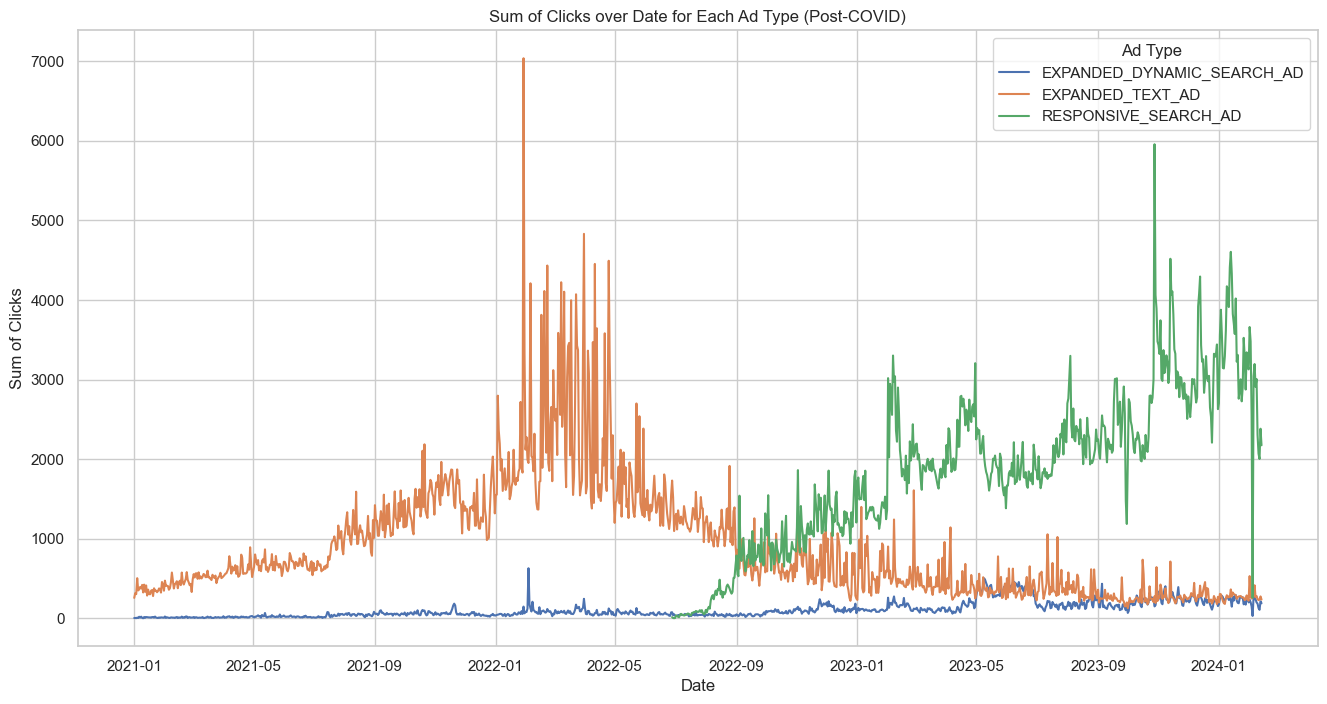

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime
Train['date'] = pd.to_datetime(Train['date'])

# Filter the data to include only dates from 2021 onwards
Train_filtered = Train[Train['date'] >= '2021-01-01']

# Group by 'ad_type' and 'date', then calculate the sum of 'clicks'
grouped_df = Train_filtered.groupby(['ad_type', 'date'])['clicks'].sum().reset_index()

# Set the plot size and style
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Plot the sum of 'clicks' over 'date' for each 'ad_type' using seaborn
sns.lineplot(data=grouped_df, x='date', y='clicks', hue='ad_type')

plt.xlabel('Date')
plt.ylabel('Sum of Clicks')
plt.title('Sum of Clicks over Date for Each Ad Type (Post-COVID)')
plt.legend(title='Ad Type')
plt.grid(True)
plt.show()


In [141]:
Train2=Train[Train['date']>='2022-08-30']

In [142]:
Train2.groupby(['day_of_week'])['clicks'].mean().reset_index()

,day_of_week,clicks
0,Friday,8.542792
1,Monday,9.023654
2,Saturday,8.725250
3,Sunday,8.445261
4,Thursday,8.741689
5,Tuesday,8.863043
6,Wednesday,8.863032


In [145]:
Train2.groupby('ad_type')['clicks'].sum()

ad_type
EXPANDED_DYNAMIC_SEARCH_AD      95637.0
EXPANDED_TEXT_AD               236099.0
RESPONSIVE_SEARCH_AD          1099287.0
Name: clicks, dtype: float64

In [146]:
Train2.groupby('ad_type')['clicks'].mean()

ad_type
EXPANDED_DYNAMIC_SEARCH_AD     3.583655
EXPANDED_TEXT_AD               5.698470
RESPONSIVE_SEARCH_AD          11.514476
Name: clicks, dtype: float64

: 

In [ ]:
Train3=Train[Train['date']>='2022-08-30']

In [144]:
Train2.groupby('day_of_week').size().reset_index(name='count')

,day_of_week,count
0,Friday,23570
1,Monday,23757
2,Saturday,22687
3,Sunday,22009
4,Thursday,23829
5,Tuesday,24104
6,Wednesday,24032


In [143]:
Train2.groupby(['is_holiday'])['clicks'].mean().reset_index()

,is_holiday,clicks
0,False,8.759003
1,True,8.388445


In [130]:
Train['date'] = pd.to_datetime(Train['date'])

# Create a new column 'day_of_week' that extracts the day of the week from the date
Train['day_of_week'] = Train['date'].dt.day_name()

In [131]:
Train['date'] = pd.to_datetime(Train['date'])

# Create a new column 'day_of_week' that extracts the day of the week from the date
Train['day_of_week'] = Train['date'].dt.day_name()

# Create a new column 'month' that extracts the month from the date
Train['month'] = Train['date'].dt.month_name()

In [132]:
Train.groupby(['day_of_week'])['clicks'].mean().reset_index()

,day_of_week,clicks
0,Friday,7.796855
1,Monday,8.370562
2,Saturday,7.999701
3,Sunday,7.610968
4,Thursday,8.005366
5,Tuesday,8.233708
6,Wednesday,8.223931


In [133]:
Train.groupby(['month'])['clicks'].mean().reset_index()

,month,clicks
0,April,9.040549
1,August,7.120789
2,December,7.973531
3,February,9.359558
4,January,9.436099
5,July,6.592898
6,June,7.022594
7,March,8.942474
8,May,7.761889
9,November,8.674047


In [135]:
sub=pd.read_csv('SampleSubmission.csv')
sub['extracted_date'] = sub['ID'].str.extract(r'(\d{4}_\d{2}_\d{2})')

# Convert the 'extracted_date' column to datetime format
sub['extracted_date'] = pd.to_datetime(sub['extracted_date'], format='%Y_%m_%d')

# Extract the month and year from the 'extracted_date' column
sub['year_month'] = sub['extracted_date'].dt.to_period('M')

# Group by 'year_month' and count the number of rows
sub.groupby('year_month').size().reset_index(name='count')

,year_month,count
0,2020-10,2
1,2021-12,2
2,2023-03,2
3,2023-04,2
4,2023-06,2
5,2023-08,1
6,2023-09,23
7,2023-10,33
8,2023-11,13
9,2023-12,30


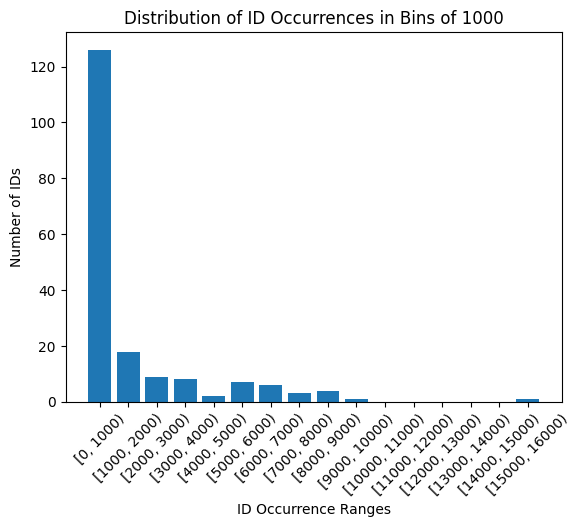

In [31]:
import matplotlib.pyplot as plt
import numpy as np
id_counts=Train['ID'].value_counts()
frequency_counts=id_counts.value_counts()
max_count = id_counts.max()
bins = np.arange(0, max_count + 1000, 1000) 

binned_counts = pd.cut(id_counts, bins, right=False, include_lowest=True)

bin_counts = binned_counts.value_counts().sort_index()

# Plotting the distribution of ID counts in bins of 1000
plt.bar([str(bin) for bin in bin_counts.index], bin_counts.values)
plt.xlabel('ID Occurrence Ranges')
plt.ylabel('Number of IDs')
plt.title('Distribution of ID Occurrences in Bins of 1000')
plt.xticks(rotation=45)
plt.show()

In [44]:
Train.columns

Index(['impressions', 'clicks', 'cost', 'conversions', 'ad_type', 'currency',
       'ID', 'date', 'call_type', 'call_status', 'start_time', 'duration',
       'end_time', 'display_location', 'impression_share', 'conversions_calls',
       'headline1_len', 'headline2_len', 'ad_description_len'],
      dtype='object')

In [ ]:
Train=Train[['impressions', 'clicks', 'cost', 'conversions', 'ad_type', 'currency',
       'ID', 'date', 'call_type', 'call_status', 'start_time', 'duration',
       'end_time', 'display_location', 'impression_share', 'conversions_calls',
       'headline1_len', 'headline2_len', 'ad_description_len']]

In [42]:
Train[Train['ID']=='ID_6083bd8472c70c3d1869bc68']

,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,start_time,duration,end_time,display_location,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len
115022,163.0,6.0,4071.000000,0.0,EXPANDED_TEXT_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2021-04-24,NaN,NaN,NaN,NaN,NaN,NaN,5.395862,0.0,2.0,5.0,12.0
115023,11.0,0.0,0.000000,0.0,EXPANDED_TEXT_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2021-04-24,NaN,NaN,NaN,NaN,NaN,NaN,5.395862,0.0,5.0,1.0,12.0
115024,136.0,6.0,1630.000000,0.0,EXPANDED_TEXT_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2021-04-25,NaN,NaN,NaN,NaN,NaN,NaN,6.614907,0.0,2.0,5.0,12.0
115025,23.0,2.0,805.000000,0.0,EXPANDED_TEXT_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2021-04-25,NaN,NaN,NaN,NaN,NaN,NaN,6.614907,0.0,5.0,1.0,12.0
115026,2.0,2.0,38.000000,0.0,EXPANDED_DYNAMIC_SEARCH_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2021-04-25,NaN,NaN,NaN,NaN,NaN,NaN,6.614907,0.0,1.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119873,20.0,5.0,1496.132968,0.0,EXPANDED_DYNAMIC_SEARCH_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,9.990000,0.0,0.0,0.0,0.0
119874,38.0,3.0,587.454048,0.0,EXPANDED_TEXT_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,9.990000,0.0,2.0,4.0,8.0
119875,4.0,1.0,469.963238,0.0,EXPANDED_TEXT_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,9.990000,0.0,4.0,1.0,11.0
119876,6.0,0.0,0.000000,0.0,EXPANDED_TEXT_AD,ZAR,ID_6083bd8472c70c3d1869bc68,2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,9.990000,0.0,4.0,1.0,8.0


In [41]:
bins = np.arange(4000, 6000, 1000)  # Adjusting bins to start from 10,000

# Using cut to bin the data for counts of 10,000 and above
binned_counts = pd.cut(id_counts, bins, right=False, include_lowest=True)

# Identifying the IDs in the desired bins
filtered_ids = id_counts[binned_counts.notna()]
filtered_ids

ID
ID_6083bd8472c70c3d1869bc68    4856
ID_6047b0d4c59eff5af82a57ee    4661
Name: count, dtype: int64

In [2]:
nan_percentage = Train.isna().mean() * 100

print(nan_percentage)

impressions            0.137966
clicks                 0.137966
cost                   0.137966
conversions            0.137966
ad_type                0.137966
currency               0.137966
ID                     0.000000
date                   0.000000
call_type             87.272614
call_status           87.272614
start_time            87.272614
duration              87.272614
end_time              87.272614
display_location      87.272614
impression_share       0.000000
conversions_calls      3.399143
headline1_len          0.137966
headline2_len          0.137966
ad_description_len     0.137966
dtype: float64


In [ ]:
filtered_df = Train[Train['call_type'].notna()]
filtered_df

In [4]:
Train['date'] = pd.to_datetime(Train['date'])

# Extract the day of the week
Train['day_of_week'] = Train['date'].dt.day_name()

# Group by 'day_of_week' and calculate the mean of 'clicks'
mean_clicks = Train.groupby('day_of_week')['clicks'].mean()
print(mean_clicks)

day_of_week
Friday       7.796855
Monday       8.370562
Saturday     7.999701
Sunday       7.610968
Thursday     8.005366
Tuesday      8.233708
Wednesday    8.223931
Name: clicks, dtype: float64


In [5]:
Train['month'] = Train['date'].dt.month

# Group by 'day_of_week' and calculate the mean of 'clicks'
mean_clicks = Train.groupby('month')['clicks'].mean()
print(mean_clicks)

month
1     9.436099
2     9.359558
3     8.942474
4     9.040549
5     7.761889
6     7.022594
7     6.592898
8     7.120789
9     6.969312
10    7.603460
11    8.674047
12    7.973531
Name: clicks, dtype: float64


In [6]:
Train['year'] = Train['date'].dt.year

# Group by 'day_of_week' and calculate the mean of 'clicks'
mean_clicks = Train.groupby('year')['clicks'].mean()
print(mean_clicks)

year
2020     7.700085
2021     6.349005
2022     7.454015
2023     8.893769
2024    11.635849
Name: clicks, dtype: float64


In [7]:
unique_values = Train['currency'].unique()

# Print the unique values
print(unique_values)

['ZAR' 'USD' nan]


In [13]:
Train[Train['currency']=='USD']

,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,...,end_time,display_location,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len,day_of_week,month,year
64310,2.0,0.0,0.0,0.0,EXPANDED_TEXT_AD,USD,ID_5f4514323f494e4a2a5eb273,2020-08-26,NaN,NaN,...,NaN,NaN,40.000000,NaN,4.0,6.0,14.0,Wednesday,8,2020
64311,2.0,0.0,0.0,0.0,EXPANDED_TEXT_AD,USD,ID_5f4514323f494e4a2a5eb273,2020-08-26,NaN,NaN,...,NaN,NaN,40.000000,NaN,4.0,4.0,15.0,Wednesday,8,2020
64312,2.0,0.0,0.0,0.0,EXPANDED_TEXT_AD,USD,ID_5f4514323f494e4a2a5eb273,2020-08-26,NaN,NaN,...,NaN,NaN,40.000000,NaN,4.0,5.0,14.0,Wednesday,8,2020
64313,2.0,0.0,0.0,0.0,EXPANDED_TEXT_AD,USD,ID_5f4514323f494e4a2a5eb273,2020-08-27,NaN,NaN,...,NaN,NaN,75.000000,NaN,4.0,4.0,15.0,Thursday,8,2020
64314,1.0,0.0,0.0,0.0,EXPANDED_TEXT_AD,USD,ID_5f4514323f494e4a2a5eb273,2020-08-27,NaN,NaN,...,NaN,NaN,75.000000,NaN,4.0,5.0,14.0,Thursday,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289416,68.0,7.0,181.0,0.0,RESPONSIVE_SEARCH_AD,USD,ID_65a7bf329fa4627faf28390c,2024-02-12,NaN,NaN,...,NaN,NaN,16.133994,0.0,1.0,5.0,14.0,Monday,2,2024
289417,27.0,2.0,70.0,0.0,RESPONSIVE_SEARCH_AD,USD,ID_65a7bf329fa4627faf28390c,2024-02-12,NaN,NaN,...,NaN,NaN,16.133994,0.0,2.0,4.0,14.0,Monday,2,2024
289418,63.0,8.0,254.0,0.0,EXPANDED_DYNAMIC_SEARCH_AD,USD,ID_65a7bf329fa4627faf28390c,2024-02-13,NaN,NaN,...,NaN,NaN,14.241276,0.0,0.0,0.0,0.0,Tuesday,2,2024
289419,43.0,5.0,141.0,0.0,RESPONSIVE_SEARCH_AD,USD,ID_65a7bf329fa4627faf28390c,2024-02-13,NaN,NaN,...,NaN,NaN,14.241276,0.0,2.0,4.0,14.0,Tuesday,2,2024


In [2]:
south_africa_holidays = [
    (1, 1),   # New Year’s Day
    (21, 3),  # Human Rights Day
    # (Good Friday date varies)
    # (Family Day date varies)
    (27, 4),  # Freedom Day
    (1, 5),   # Workers' Day
    (29, 5),  # Public holiday (General Elections)
    (16, 6),  # Youth Day
    (17, 6),  # Public holiday Youth Day observed
    (9, 8),   # National Women’s Day
    (24, 9),  # Heritage Day
    (16, 12), # Day of Reconciliation
    (25, 12), # Christmas Day
    (26, 12)  # Day of Goodwill
]

In [8]:
def is_holiday(date):
    return (date.day , date.month) in south_africa_holidays

def is_not_holiday(date):
    return (date.day , date.month) not in south_africa_holidays

Train['is_holiday'] = Train['date'].apply(is_holiday)

Train['is_not_holiday'] = Train['date'].apply(is_holiday)

mean_clicks = Train[Train['currency']=='ZAR'].groupby('is_holiday')['clicks'].mean()


In [35]:
mean_clicks

is_holiday
False    8.196591
True     7.559191
Name: clicks, dtype: float64

In [36]:
mean_clicks = Train.groupby('is_holiday')['clicks'].mean()
mean_clicks

is_holiday
False    8.060008
True     7.417376
Name: clicks, dtype: float64

In [38]:
Train.head()

,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,...,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len,day_of_week,month,year,is_holiday,is_not_holiday
0,142.0,15.0,3393.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,...,16.279669,0.0,2.0,5.0,11.0,Wednesday,1,2020,True,True
1,89.0,8.0,1817.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,...,16.279669,0.0,2.0,2.0,13.0,Wednesday,1,2020,True,True
2,59.0,8.0,1743.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,...,16.279669,0.0,2.0,2.0,10.0,Wednesday,1,2020,True,True
3,78.0,4.0,917.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,...,16.279669,0.0,2.0,3.0,13.0,Wednesday,1,2020,True,True
4,20.0,1.0,217.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,...,16.279669,0.0,2.0,2.0,13.0,Wednesday,1,2020,True,True


In [9]:
Train=Train[['date', 'ID', 'clicks']].groupby(['date','ID']).sum().reset_index()

In [16]:

Train[Train['ID']=='ID_5da86e71bf5dee4cf5047046'].tail(50)

,date,ID,clicks
58981,2023-11-20,ID_5da86e71bf5dee4cf5047046,156.0
59096,2023-11-21,ID_5da86e71bf5dee4cf5047046,144.0
59212,2023-11-22,ID_5da86e71bf5dee4cf5047046,156.0
59331,2023-11-23,ID_5da86e71bf5dee4cf5047046,152.0
59449,2023-11-24,ID_5da86e71bf5dee4cf5047046,175.0
59563,2023-11-25,ID_5da86e71bf5dee4cf5047046,127.0
59675,2023-11-26,ID_5da86e71bf5dee4cf5047046,160.0
59788,2023-11-27,ID_5da86e71bf5dee4cf5047046,137.0
59903,2023-11-28,ID_5da86e71bf5dee4cf5047046,125.0
60018,2023-11-29,ID_5da86e71bf5dee4cf5047046,254.0


In [42]:
import prophet

C:\Users\donra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [13]:
submission=pd.read_csv("SampleSubmission.csv")
submission['parsed_date'] = pd.to_datetime(submission['ID'].apply(lambda x: '/'.join(x.split('_')[2:])))
submission['ID'] = submission['ID'].apply(lambda x: '_'.join(x.split('_')[:2]))
submission.head()

,ID,clicks,parsed_date
0,ID_5da86e71bf5dee4cf5047046,0,2024-01-22
1,ID_5da86e71bf5dee4cf5047046,0,2024-01-29
2,ID_5e43c29e6279884e2827d894,0,2024-02-21
3,ID_5e43c29e6279884e2827d894,0,2024-02-28
4,ID_5e4e7b480e374330ee151305,0,2023-12-04


In [17]:
import pandas as pd
from prophet import Prophet

submission=pd.read_csv("SampleSubmission.csv")

submission['parsed_date'] = pd.to_datetime(submission['ID'].apply(lambda x: '_'.join(x.split('_')[2:])), format='%Y_%m_%d')
submission['ID'] = submission['ID'].apply(lambda x: '_'.join(x.split('_')[:2]))

results = {}
# Assuming your code above here
for index, row in submission.iterrows():
    id = row['ID']
    forecast_date = row['parsed_date']
    
    # Filter dataframe2 for the specific ID
    df_filtered = Train[Train['ID'] == id]
    
    # Check if df_filtered is not empty and contains date data
    if df_filtered.empty or df_filtered['date'].max() is pd.NaT:
        print(f"No data available for ID: {id}")
        continue
    
    # Prepare data for Prophet
    df_filtered = df_filtered.rename(columns={'date': 'ds', 'clicks': 'y'})
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'])
    
    # Train the Prophet model
    model = Prophet()
    model.fit(df_filtered)
    
    # Calculate the number of periods to predict
    periods_to_predict = (forecast_date - df_filtered['ds'].max()).days
    if periods_to_predict < 0:
        print(f"Forecast date {forecast_date} is before the last available date in data for ID: {id}")
        continue
    

    if pd.notna(df_filtered['ds'].max()):
        periods_to_predict = (forecast_date - df_filtered['ds'].max()).days
        if periods_to_predict < 0:
            print(f"Forecast date {forecast_date} is before the last available date in data for ID: {id}")
            continue
    else:
        print(f"Missing or invalid dates in data for ID: {id}")
        continue

    # Check if periods_to_predict is NaN
    if pd.isna(periods_to_predict):
        print(f"Failed to calculate periods_to_predict for ID: {id} with forecast_date: {forecast_date}")
        continue
    # Prepare future dataframe for the dates to predict
    future = model.make_future_dataframe(periods=periods_to_predict)
    forecast = model.predict(future)
    
    # Retrieve the forecast for the required date
    if forecast_date in forecast['ds'].values:
        forecast_result = forecast.loc[forecast['ds'] == forecast_date, 'yhat'].values[0]
        results[row['ID']] = forecast_result
    else:
        print(f"Forecast not available for the date: {forecast_date} for ID: {id}")

# Update alpha with results if available
submission['clicks'] = submission['ID'].map(results)


C:\Users\donra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
13:57:52 - cmdstanpy - INFO - Chain [1] start processing
13:57:52 - cmdstanpy - INFO - Chain [1] done processing
13:57:53 - cmdstanpy - INFO - Chain [1] start processing
13:57:53 - cmdstanpy - INFO - Chain [1] done processing
13:57:53 - cmdstanpy - INFO - Chain [1] start processing
13:57:53 - cmdstanpy - INFO - Chain [1] done processing
13:57:53 - cmdstanpy - INFO - Chain [1] start processing
13:57:54 - cmdstanpy - INFO - Chain [1] done processing
13:57:54 - cmdstanpy - INFO - Chain [1] start processing
13:57:54 - cmdstanpy - INFO - Chain [1] done processing
13:57:54 - cmdstanpy - INFO - Cha

In [18]:
submission.head()

,ID,clicks,parsed_date
0,ID_5da86e71bf5dee4cf5047046,109.216479,2024-01-22
1,ID_5da86e71bf5dee4cf5047046,109.216479,2024-01-29
2,ID_5e43c29e6279884e2827d894,5.788367,2024-02-21
3,ID_5e43c29e6279884e2827d894,5.788367,2024-02-28
4,ID_5e4e7b480e374330ee151305,3.450094,2023-12-04


In [20]:
ids=pd.read_csv("SampleSubmission.csv")

In [24]:
real_submission = pd.DataFrame({
    'ID': ids['ID'],
    'clicks': submission['clicks']
})

In [25]:
real_submission.loc[real_submission['clicks']<0, 'clicks']=0

In [27]:
real_submission.to_csv('prophetonly.csv',index=False)

In [39]:
Train.head()

,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,start_time,duration,end_time,display_location,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len
0,142.0,15.0,3393.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,5.0,11.0
1,89.0,8.0,1817.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,13.0
2,59.0,8.0,1743.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,10.0
3,78.0,4.0,917.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,3.0,13.0
4,20.0,1.0,217.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,13.0


In [38]:
print(Train['ad_type'].unique())

['EXPANDED_TEXT_AD' 'EXPANDED_DYNAMIC_SEARCH_AD' 'RESPONSIVE_SEARCH_AD'
 nan]


In [55]:

new_df = Train.groupby(['ID', 'date']).agg(
    total_clicks=('clicks', 'sum'),       
    ads_per_day=('clicks', 'size')        
).reset_index()
new_df['date'] = pd.to_datetime(new_df['date'])

# Adding day of the week, month and year
new_df['day_of_week'] = new_df['date'].dt.day_name()
new_df['month'] = new_df['date'].dt.month
new_df['year'] = new_df['date'].dt.year

# List of holidays in (month, day) format
south_africa_holidays = [
    (1, 1), (21, 3), (27, 4), (1, 5), (29, 5), (16, 6),
    (17, 6), (9, 8), (24, 9), (16, 12), (25, 12), (26, 12)
]

# Define a function to check if a date is a holiday
# Define a function to check if a date is a holiday



# Apply the function to create the 'holiday' column
new_df['holiday'] = new_df.apply(is_holiday, axis=1)

In [57]:
def is_holiday(date):
    month_day = (date.month, date.day)
    south_africa_holidays = [
        (1, 1), (21, 3), (27, 4), (1, 5), (29, 5), (16, 6),
        (17, 6), (9, 8), (24, 9), (16, 12), (25, 12), (26, 12)
    ]
    return 1 if month_day in south_africa_holidays else 0

In [52]:
new_df.head()

,ID,total_clicks,ads_per_day,day_of_week,month,year,holiday
0,ID_5da86e71bf5dee4cf5047046,36.0,6,Wednesday,1,2020,1
1,ID_5da86e71bf5dee4cf5047046,50.0,6,Thursday,1,2020,0
2,ID_5da86e71bf5dee4cf5047046,54.0,6,Friday,1,2020,0
3,ID_5da86e71bf5dee4cf5047046,47.0,6,Saturday,1,2020,0
4,ID_5da86e71bf5dee4cf5047046,59.0,6,Sunday,1,2020,1


In [50]:
ids.head()

,ID,clicks
0,ID_5da86e71bf5dee4cf5047046_2024_01_22,0
1,ID_5da86e71bf5dee4cf5047046_2024_01_29,0
2,ID_5e43c29e6279884e2827d894_2024_02_21,0
3,ID_5e43c29e6279884e2827d894_2024_02_28,0
4,ID_5e4e7b480e374330ee151305_2023_12_04,0


In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
def parse_id_date(ids_row):
    parts = ids_row['ID'].split('_')
    id = '_'.join(parts[:-3])  # Rejoin all parts excluding the last three which are the date parts
    date = pd.to_datetime(f"{parts[-3]}-{parts[-2]}-{parts[-1]}")
    return id, date
def prepare_inputs(new_df, ids):
    for index, row in ids.iterrows():
        id, date = parse_id_date(row)
        temp_df = new_df[(new_df['ID'] == id)]
        
        # Ensure day_of_week is categorical
        temp_df['day_of_week'] = temp_df['day_of_week'].astype('category')

        # Prepare training data for this ID
        train_x = temp_df[['ads_per_day', 'day_of_week', 'month', 'year', 'holiday']]
        train_y = temp_df['total_clicks']

        # Train the model
        model = LGBMRegressor()
        model.fit(train_x, train_y, categorical_feature=['day_of_week'])

        # Prepare prediction data
        predict_df = new_df[(new_df['ID'] == id) & (new_df['date'] == date)]
        if predict_df.empty:
            day_of_week = date.day_name()
            recent_ads = temp_df[temp_df['day_of_week'] == day_of_week].tail(10)['ads_per_day'].mean()
            inputs = pd.DataFrame({
                'ads_per_day': [recent_ads],
                'day_of_week': [day_of_week],
                'month': [date.month],
                'year': [date.year],
                'holiday': [is_holiday(date)]
            })
            inputs['day_of_week'] = inputs['day_of_week'].astype('category')
        else:
            inputs = predict_df[['ads_per_day', 'day_of_week', 'month', 'year', 'holiday']]
            inputs['day_of_week'] = inputs['day_of_week'].astype('category')

        # Predict and update ids DataFrame
        predicted_clicks = model.predict(inputs)[0]
        ids.at[index, 'clicks'] = predicted_clicks

# Assuming 'new_df' and 'ids' are defined
prepare_inputs(new_df, ids)

In [107]:
ids.to_csv("lightgbm.csv",index=False)

In [62]:
Train.head()

,impressions,clicks,cost,conversions,ad_type,currency,ID,date,call_type,call_status,start_time,duration,end_time,display_location,impression_share,conversions_calls,headline1_len,headline2_len,ad_description_len
0,142.0,15.0,3393.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,5.0,11.0
1,89.0,8.0,1817.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,13.0
2,59.0,8.0,1743.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,10.0
3,78.0,4.0,917.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,3.0,13.0
4,20.0,1.0,217.0,0.0,EXPANDED_TEXT_AD,ZAR,ID_5da86e71bf5dee4cf5047046,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,16.279669,0.0,2.0,2.0,13.0


# EDA pt 2

I want to see the following on graphs: evolution of daily clicks, evolution of impressions, evolution of number of ads per day for a sample of client in every class of total number of data 

In [64]:
id_counts = Train['ID'].value_counts()
max_count = id_counts.max()
bins = np.arange(0, max_count + 1000, 1000)  
binned_counts = pd.cut(id_counts, bins, right=False, include_lowest=True)
binned_counts_df = pd.DataFrame({'ID_Count': id_counts, 'Bin': binned_counts})

non_zero_bins = binned_counts_df.groupby('Bin').filter(lambda x: len(x) > 0)

def safe_sample(group):
    if len(group) > 0: 
        return group.sample(1)
    return pd.DataFrame()  

sampled_ids = non_zero_bins.groupby('Bin').apply(safe_sample).dropna()

C:\Users\donra\AppData\Local\Temp\ipykernel_16080\4089015164.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_zero_bins = binned_counts_df.groupby('Bin').filter(lambda x: len(x) > 0)
C:\Users\donra\AppData\Local\Temp\ipykernel_16080\4089015164.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_ids = non_zero_bins.groupby('Bin').apply(safe_sample).dropna()
C:\Users\donra\AppData\Local\Temp\ipykernel_16080\4089015164.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excl

In [65]:
sampled_ids 

,,ID_Count,Bin
Bin,,,
"[0, 1000)",ID_6526707040b2f47f114f86aa,254.0,"[0, 1000)"
"[1000, 2000)",ID_64268025a80ef266c3417e27,1154.0,"[1000, 2000)"
"[2000, 3000)",ID_618a50e0500d9413097ccd75,2501.0,"[2000, 3000)"
"[3000, 4000)",ID_5e4e7b480e374330ee151305,3766.0,"[3000, 4000)"
"[4000, 5000)",ID_6047b0d4c59eff5af82a57ee,4661.0,"[4000, 5000)"
"[5000, 6000)",ID_617beb7403c1051f8a42b524,5289.0,"[5000, 6000)"
"[6000, 7000)",ID_602b729b3f4128452c1c2f64,6535.0,"[6000, 7000)"
"[7000, 8000)",ID_604752a9861a02467a27c054,7790.0,"[7000, 8000)"
"[8000, 9000)",ID_61321c129a9b4c145436394d,8629.0,"[8000, 9000)"


In [78]:
data = Train[Train['ID'] == 'ID_5da86e71bf5dee4cf5047046'].groupby('date').agg(
        total_clicks=('clicks', 'sum'),
        total_impressions=('impressions', 'sum'),
        count_rows=('ID', 'size')
    )

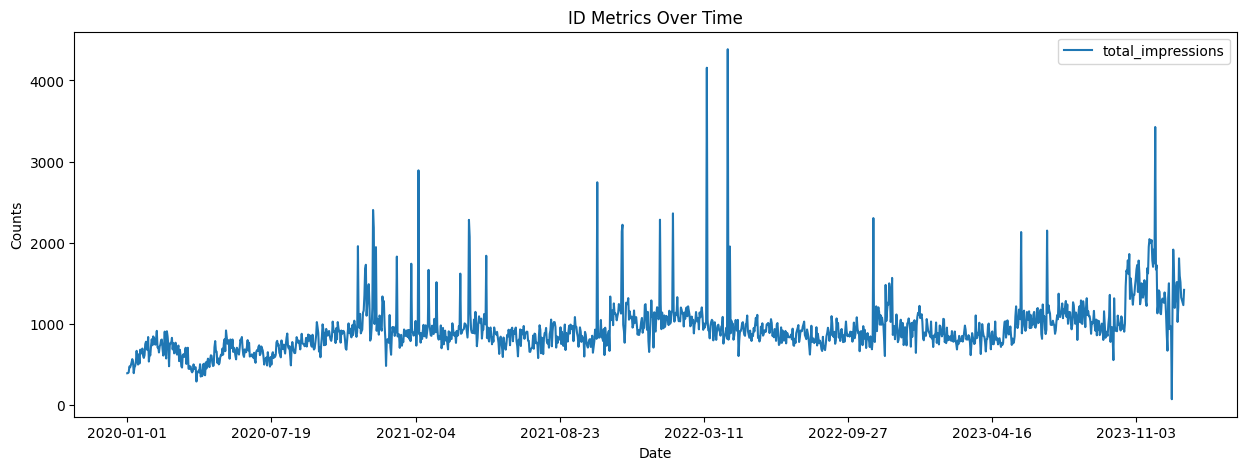

In [79]:
data[['total_impressions']].plot(kind='line', figsize=(15, 5))
plt.title('ID Metrics Over Time')
plt.ylabel('Counts')
plt.xlabel('Date')
plt.show()

In [81]:
data.tail(50)

,total_clicks,total_impressions,count_rows
date,,,
2023-11-20,156.0,1950.0,9
2023-11-21,144.0,2045.0,9
2023-11-22,156.0,2027.0,9
2023-11-23,152.0,1995.0,9
2023-11-24,175.0,2033.0,9
2023-11-25,127.0,1782.0,9
2023-11-26,160.0,1704.0,9
2023-11-27,137.0,1916.0,9
2023-11-28,125.0,1747.0,9


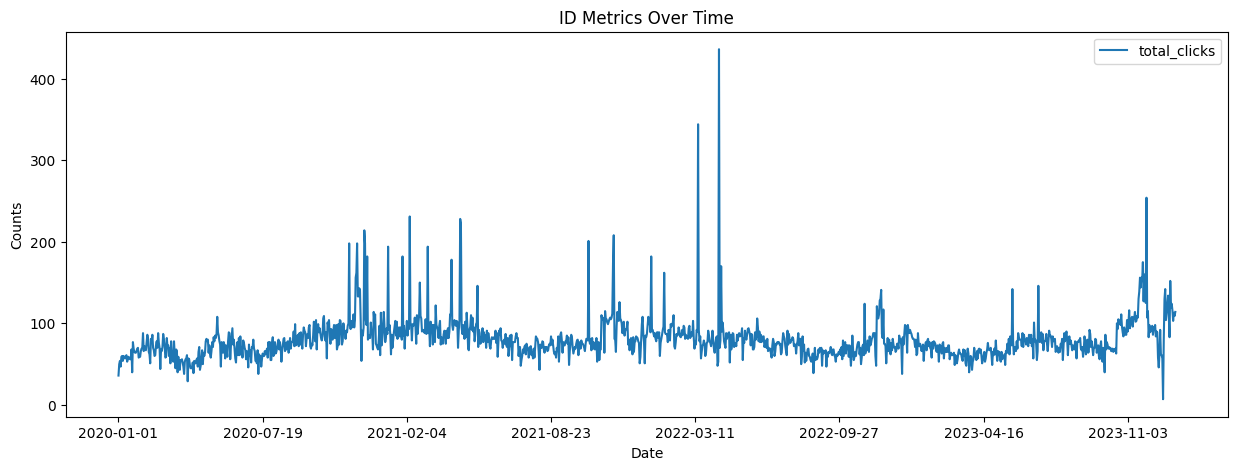

In [76]:
data[['total_clicks']].plot(kind='line', figsize=(15, 5))
plt.title('ID Metrics Over Time')
plt.ylabel('Counts')
plt.xlabel('Date')
plt.show()

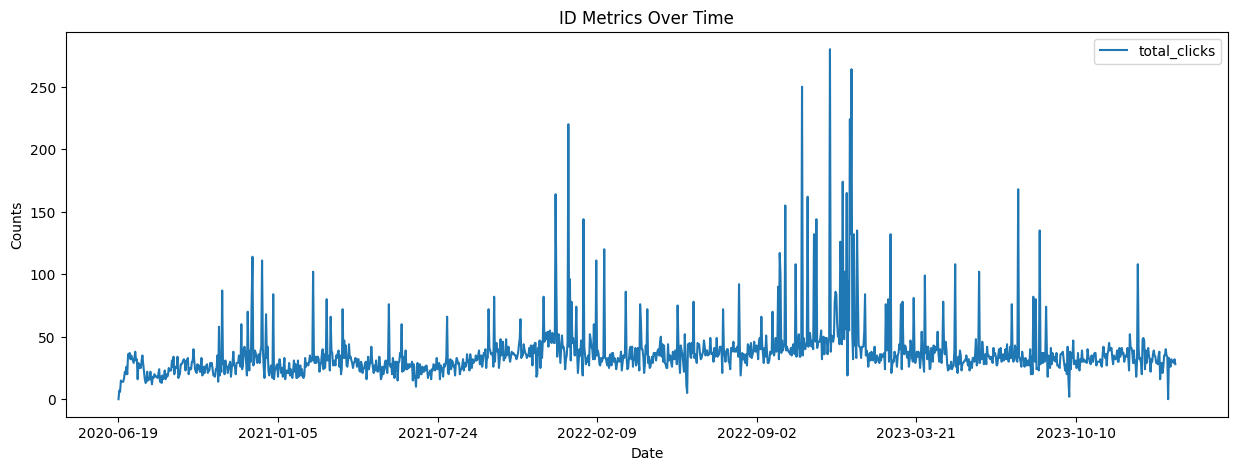

In [95]:
data = Train[Train['ID'] == 'ID_5ee74f25f865a8154966b412'].groupby('date').agg(
        total_clicks=('clicks', 'sum'),
        total_impressions=('impressions', 'sum'),
        count_rows=('ID', 'size')
    )
data[['total_clicks']].plot(kind='line', figsize=(15, 5))
plt.title('ID Metrics Over Time')
plt.ylabel('Counts')
plt.xlabel('Date')
plt.show()

In [93]:
data.tail()

,total_clicks,total_impressions,count_rows
date,,,
2024-02-09,30.0,200.0,9
2024-02-10,30.0,96.0,9
2024-02-11,29.0,125.0,9
2024-02-12,32.0,188.0,9
2024-02-13,28.0,192.0,9


In [103]:
data[data['year']==2024]

,total_clicks,total_impressions,count_rows,date,year,month
date,,,,,,
2024-01-01,104.0,1198.0,9,2024-01-01,2024,1
2024-01-02,114.0,1334.0,9,2024-01-02,2024,1
2024-01-03,122.0,1433.0,9,2024-01-03,2024,1
2024-01-04,134.0,1516.0,9,2024-01-04,2024,1
2024-01-05,108.0,1025.0,9,2024-01-05,2024,1
2024-01-06,83.0,1210.0,9,2024-01-06,2024,1
2024-01-07,152.0,1808.0,9,2024-01-07,2024,1
2024-01-08,119.0,1592.0,9,2024-01-08,2024,1
2024-01-09,124.0,1515.0,9,2024-01-09,2024,1
